In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re

In [3]:
#!python -m pip install pandas
#!python -m pip install matplotlib
#Installed ipykernal package

In [4]:
df = pd.read_csv("../data/covid_19_data_2020.csv")
df.head()

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
## Assumption: Dates are all in the correct format.

In [6]:
## Countries
df.Country.value_counts().head(10)

US                10906
Russia             7592
Mainland China     6849
Japan              4682
Mexico             3347
Colombia           3243
India              3081
Brazil             2858
Peru               2527
Ukraine            2520
Name: Country, dtype: int64

In [7]:
df.Country.value_counts().tail(10)

Bahamas, The           3
Curacao                2
('St. Martin',)        1
St. Martin             1
 Azerbaijan            1
North Ireland          1
Channel Islands        1
Cape Verde             1
Republic of Ireland    1
East Timor             1
Name: Country, dtype: int64

We can see that there are some duplicate countries that have been entered with inconsistent names that do not match.

In [8]:
df_copy = df.copy()
df_copy.drop(columns=['ObservationID'], inplace=True)

<AxesSubplot:xlabel='ObservationDate'>

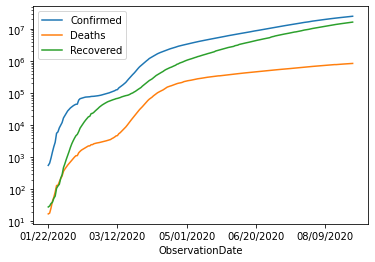

In [9]:
df_copy.groupby('ObservationDate').sum().plot(logy=True)

In [10]:
print(f'Running from {df.ObservationDate.min()} to {df.ObservationDate.max()}')

date_format = "%m/%d/%Y"
df_copy.loc[:, 'date'] = df_copy.ObservationDate.apply(lambda x: datetime.strptime(x, date_format))
delta = df_copy.date.max() - df_copy.date.min()
print(delta.days+1)

Running from 01/22/2020 to 08/29/2020
221


This tells us that there is a total 221 days (including the last date) of recorded data. As our first run through, we will concentrate on countries that were able to consistently provide observations for each day.

Mainland China 221
Hong Kong 221
Macau 221
Taiwan 221
US 221
Japan 221
Thailand 221
South Korea 221


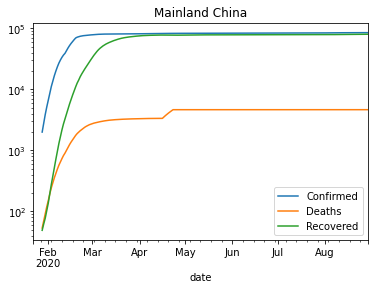

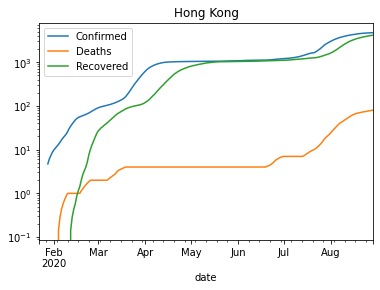

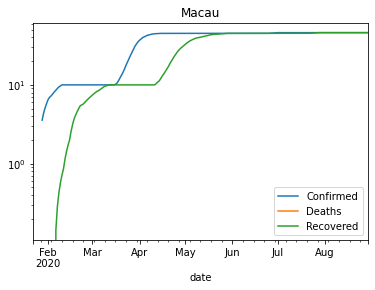

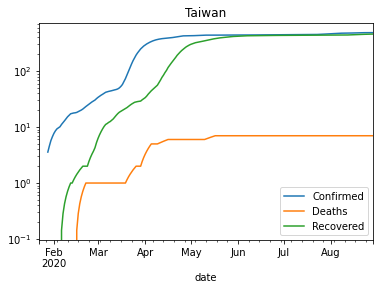

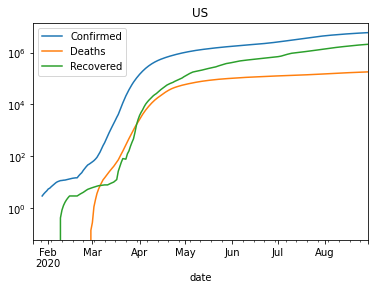

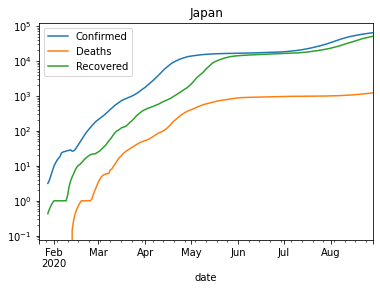

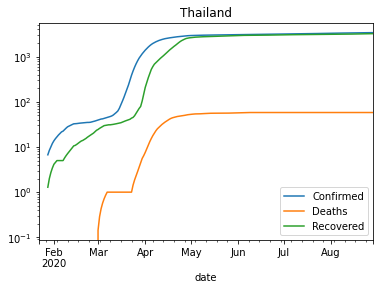

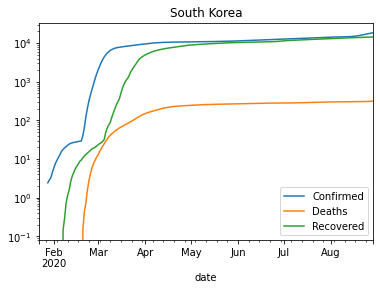

In [11]:
#Let's see how many countries we have that have observations 
countries_to_keep = []
for country in df_copy.Country.unique():
    subset_df = df_copy[df_copy.Country == country]
    ## Group by the observation date, collect the values and smooth across 7 days of values
    subset_df = subset_df.groupby(['date']).sum().rolling(window=7).mean()
    if len(subset_df) == 221:
        print(country, len(subset_df))
        subset_df.plot(logy=True, title=f'{country}')
        countries_to_keep.append(country)

- Macau have no death data, therefore we remove this from the data.
- Retain:
> - Mainland China
> - Hong Kong
> - Taiwan
> - US
> - Japan
> - Thailand
> - South Korea

In [12]:
countries_to_keep.remove('Macau')
print(countries_to_keep)

['Mainland China', 'Hong Kong', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea']


In [13]:
df_copy.head()

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,date
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [14]:
## Convert dates to date objects so that they can be compared. Drop the time since we don't need data that granular 
## and this will also result in non matching dates.
df_copy.loc[:, 'Last Update'] = pd.to_datetime(df_copy['Last Update']).dt.date
df_copy.loc[:, 'ObservationDate'] = pd.to_datetime(df_copy['ObservationDate']).dt.date
df_copy[60:80]

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,date
60,2020-01-23,Qinghai,Mainland China,2020-01-23,0.0,0.0,0.0,2020-01-23
61,2020-01-23,Shaanxi,Mainland China,2020-01-23,3.0,0.0,0.0,2020-01-23
62,2020-01-23,Shandong,Mainland China,2020-01-23,6.0,0.0,0.0,2020-01-23
63,2020-01-23,Shanghai,Mainland China,2020-01-23,16.0,0.0,0.0,2020-01-23
64,2020-01-23,Shanxi,Mainland China,2020-01-23,1.0,0.0,0.0,2020-01-23
65,2020-01-23,Sichuan,Mainland China,2020-01-23,8.0,0.0,0.0,2020-01-23
66,2020-01-23,Taiwan,Taiwan,2020-01-23,1.0,0.0,0.0,2020-01-23
67,2020-01-23,Tianjin,Mainland China,2020-01-23,4.0,0.0,0.0,2020-01-23
68,2020-01-23,Tibet,Mainland China,2020-01-23,0.0,0.0,0.0,2020-01-23
69,2020-01-23,Washington,US,2020-01-23,1.0,0.0,0.0,2020-01-23


In [15]:
df_copy.dtypes

ObservationDate            object
State                      object
Country                    object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
date               datetime64[ns]
dtype: object

In [16]:
## A quick test to see if all of the dates match
df_copy['Last Update'].equals(df_copy['ObservationDate'])

False

In [17]:
## Since we know the dates don't match, which ones and how many do not match?
df_copy.loc[:, 'date_match'] = df_copy.apply(lambda x: 1 if x['ObservationDate'] == x['Last Update'] else 0, axis=1)
print(len(df_copy), df_copy['date_match'].sum())
print('Number of non matches between dates:', len(df_copy) - df_copy['date_match'].sum())

98252 13549
Number of non matches between dates: 84703


This show that nearly 85000 dates do not match between Last Update and ObservationDate which isn't necessarily a problem depending on the definition of the data in the columns. If we take a look at the data values that aren't matching, we can see that the dates of Last Updates can either be before or after the ObservationDate. Assuming that the 'LastUpdate' refers to the datetime of any initial entries, updates or amendments to the data values, it would appear odd that values for any given ObservationDate would be submitted before the date had passed. 

Since there is some consistency issues with some of the countries submissions, let's remove them since we've already decided to work only with countries that have ObservationDates for each date between 01/22/2020 to 08/29/2020.

In [18]:
print(df_copy[['ObservationDate', 'Last Update']][df_copy['date_match'] == 0][20:40])

    ObservationDate Last Update
603      2020-02-02  2020-02-01
604      2020-02-02  2020-02-01
608      2020-02-02  2020-01-31
610      2020-02-02  2020-01-31
611      2020-02-02  2020-02-01
612      2020-02-02  2020-02-01
613      2020-02-02  2020-01-31
614      2020-02-02  2020-02-01
615      2020-02-02  2020-01-31
616      2020-02-02  2020-02-01
617      2020-02-02  2020-01-31
618      2020-02-02  2020-02-01
619      2020-02-02  2020-01-31
620      2020-02-02  2020-02-01
621      2020-02-02  2020-02-01
622      2020-02-02  2020-02-01
623      2020-02-02  2020-02-01
624      2020-02-02  2020-02-01
625      2020-02-02  2020-02-01
626      2020-02-02  2020-02-01


In [19]:
## We keep 23321 records after removing all other countries but those we intend to study.
df_countries_to_keep = df_copy[df_copy['Country'].isin(countries_to_keep)]
print(df_countries_to_keep.shape)

(23321, 9)


In [20]:
## From these counts, it suggests that only the US, Mainland China and Japan are submitting values from sub areas of the country
print(df_countries_to_keep['Country'].value_counts())
    

US                10906
Mainland China     6849
Japan              4682
Hong Kong           221
Taiwan              221
Thailand            221
South Korea         221
Name: Country, dtype: int64


In [21]:
## We can see here that there is a vast difference between the head and tail end of number of observations seen in these states. 
# We do not see consistent result entries for states within the US.
df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'US'].value_counts()

Washington               183
Illinois                 180
California               179
Arizona                  179
South Carolina           173
                        ... 
Collin County, TX          1
Jefferson County, KY       1
Jefferson Parish, LA       1
Shasta County, CA          1
Santa Cruz County, CA      1
Name: State, Length: 199, dtype: int64

In [22]:
## We can see that there are observation values for each day consistently throughout the state entries. With Tibet being the lowest at the end.
# We need to decide whether to keep or remove this entry.
df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'Mainland China'].value_counts()

Gansu             223
Hebei             223
Anhui             221
Jiangxi           221
Yunnan            221
Xinjiang          221
Tianjin           221
Sichuan           221
Shanxi            221
Shanghai          221
Shandong          221
Shaanxi           221
Qinghai           221
Ningxia           221
Liaoning          221
Jilin             221
Jiangsu           221
Beijing           221
Inner Mongolia    221
Hunan             221
Hubei             221
Henan             221
Heilongjiang      221
Hainan            221
Guizhou           221
Guangxi           221
Guangdong         221
Fujian            221
Chongqing         221
Zhejiang          221
Tibet             215
Name: State, dtype: int64

In [23]:
## Again we see data entry consistency across the states however, we only seem to have 94 observation dates.
df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'Japan'].value_counts()

Aichi              94
Nagasaki           94
Niigata            94
Oita               94
Okayama            94
Okinawa            94
Osaka              94
Port Quarantine    94
Saga               94
Saitama            94
Shiga              94
Shimane            94
Shizuoka           94
Tochigi            94
Tokushima          94
Tokyo              94
Tottori            94
Toyama             94
Unknown            94
Wakayama           94
Yamagata           94
Yamaguchi          94
Yamanashi          94
Nara               94
Nagano             94
Akita              94
Miyazaki           94
Aomori             94
Chiba              94
Ehime              94
Fukui              94
Fukuoka            94
Fukushima          94
Gifu               94
Gunma              94
Hiroshima          94
Hokkaido           94
Hyogo              94
Ibaraki            94
Ishikawa           94
Kagawa             94
Kagoshima          94
Kanagawa           94
Kochi              94
Kumamoto           94
Kyoto     

In [24]:
## Trying a few states, we can see that the data for the Japanese states only covers a small span of time which is consistent through may to August
# (Iwate spans a shorter period between July to August)
print(df_countries_to_keep['ObservationDate'][df_countries_to_keep['State'] == 'Aichi'].min())
print(df_countries_to_keep['ObservationDate'][df_countries_to_keep['State'] == 'Aichi'].max())

2020-05-28
2020-08-29


In [25]:
## All observations from Hong Kong have the countries name repeated in the State column. 
# Thailand has 49 entries of their country name, while the rest have been entered as NaN.
# Thailand and South Korea have both left their State fields empty.

print(df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'Hong Kong'].value_counts())
print(df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'Taiwan'].value_counts())
print(df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'Thailand'].value_counts())
print(df_countries_to_keep['State'][df_countries_to_keep['Country'] == 'South Korea'].value_counts())


Hong Kong    221
Name: State, dtype: int64
Taiwan    49
Name: State, dtype: int64
Series([], Name: State, dtype: int64)
Series([], Name: State, dtype: int64)


In [26]:
df_countries_to_keep[['State', 'Country']][df_countries_to_keep['Country'] == 'Taiwan']

,State,Country
28,Taiwan,Taiwan
66,Taiwan,Taiwan
107,Taiwan,Taiwan
154,Taiwan,Taiwan
199,Taiwan,Taiwan
...,...,...
94690,NaN,Taiwan
95432,NaN,Taiwan
96174,NaN,Taiwan
96916,NaN,Taiwan


In [27]:
df_countries_to_keep[['State', 'Country']][df_countries_to_keep['Country'] == 'Thailand']

,State,Country
36,NaN,Thailand
74,NaN,Thailand
120,NaN,Thailand
161,NaN,Thailand
207,NaN,Thailand
...,...,...
94693,NaN,Thailand
95435,NaN,Thailand
96177,NaN,Thailand
96919,NaN,Thailand


From these results, we can see that the results from the US and Japan are inconsistent. It will be easier to remove these for now with a view to incorporate them later if there is enough time. Since we want to focus our study on incorporating the population size of a city or country, we keep Mainland China to test density between states consistent with a government who took a blanket approach to COVID precautions.

In [28]:
countries_to_keep.remove('US')
countries_to_keep.remove('Japan')
countries_to_keep

['Mainland China', 'Hong Kong', 'Taiwan', 'Thailand', 'South Korea']

In [29]:
## We keep 23321 records after removing all other countries but those we intend to study.
df_countries_removed = df_copy[df_copy['Country'].isin(countries_to_keep)]
print(df_countries_removed.shape)

(7733, 9)


In [30]:
## Let's fix the NaN values in States
df_countries_removed.loc[:, 'State'] = df.apply(lambda x: x['Country'] if x['Country'] != 'Mainland China' else x['State'], axis=1)

/tmp/ipykernel_354958/154938682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_removed.loc[:, 'State'] = df.apply(lambda x: x['Country'] if x['Country'] != 'Mainland China' else x['State'], axis=1)


In [31]:
df_countries_removed['State'].value_counts()

Hebei             223
Gansu             223
Sichuan           221
Ningxia           221
Qinghai           221
Shaanxi           221
Shandong          221
Shanghai          221
Shanxi            221
Anhui             221
Jilin             221
Taiwan            221
Tianjin           221
Xinjiang          221
Yunnan            221
Zhejiang          221
Thailand          221
Liaoning          221
Jiangxi           221
Beijing           221
Jiangsu           221
Inner Mongolia    221
Hunan             221
Hubei             221
Hong Kong         221
Henan             221
Heilongjiang      221
Hainan            221
Guizhou           221
Guangxi           221
Guangdong         221
Fujian            221
Chongqing         221
South Korea       221
Tibet             215
Name: State, dtype: int64

In [32]:
## Using a subset of data available at the URL below, we curated a dataset of information that may be interesting to our study
# https://population.un.org/wpp/Download/Standard/CSV/
df_population_stats = pd.read_csv('../data/population_data.csv')
df_population_stats.head()

,LocTypeName,Location,Time,TPopulation1July,PopDensity,PopSexRatio,MedianAgePop,PopChange,PopGrowthRate,Deaths,DeathsMale,DeathsFemale
0,World,World,1950,2499322.157,19.1661,99.3145,22.2243,43294.850,1.732,48788.536,25784.509,23004.027
1,World,World,1951,2543130.380,19.5020,99.3584,22.1716,44321.597,1.743,48514.552,25505.184,23009.368
2,World,World,1952,2590270.898,19.8635,99.4248,22.1083,49959.439,1.929,47646.612,24935.224,22711.388
3,World,World,1953,2640278.797,20.2470,99.4741,22.0364,50056.357,1.896,47499.083,24806.138,22692.945
4,World,World,1954,2691979.339,20.6435,99.5454,21.9524,53344.728,1.982,47002.805,24539.831,22462.974


In [33]:
## Let's see if we can find our countries and states of interest in the data
for state in df_countries_removed.State.unique():
    subset_df = df_population_stats[df_population_stats['Location'] == state]
    print(state, ':', subset_df.shape)

Anhui : (0, 12)
Beijing : (0, 12)
Chongqing : (0, 12)
Fujian : (0, 12)
Gansu : (0, 12)
Guangdong : (0, 12)
Guangxi : (0, 12)
Guizhou : (0, 12)
Hainan : (0, 12)
Hebei : (0, 12)
Heilongjiang : (0, 12)
Henan : (0, 12)
Hong Kong : (0, 12)
Hubei : (0, 12)
Hunan : (0, 12)
Inner Mongolia : (0, 12)
Jiangsu : (0, 12)
Jiangxi : (0, 12)
Jilin : (0, 12)
Liaoning : (0, 12)
Ningxia : (0, 12)
Qinghai : (0, 12)
Shaanxi : (0, 12)
Shandong : (0, 12)
Shanghai : (0, 12)
Shanxi : (0, 12)
Sichuan : (0, 12)
Taiwan : (0, 12)
Tianjin : (0, 12)
Tibet : (0, 12)
Xinjiang : (0, 12)
Yunnan : (0, 12)
Zhejiang : (0, 12)
Thailand : (152, 12)
South Korea : (0, 12)


In [34]:
## Welp, that didn't go well but it is likely that the state / country names are slightly different in the data. Let's see if we can find them.
locations = df_population_stats.Location.unique().tolist()
for state in df_countries_removed.State.unique():
    search_string = f'(?b)(?:{state.lower()})'+'{e<=1}'
    for location in df_population_stats.Location.unique():
        try:
            matching = re.search(search_string, location.lower())[0]
            print(location, ':', matching)
        except:
            pass


We managed to find Taiwan and Hong Kong but we are still missing South Korea and the chinese states (even if we increase the error rate threshold).
String approximation methods and NLP techniques can be used to enhance the search (such Levenshtein, Mongue-Elkan, Dependency Parsing, etc.) 
but for this particular project, it isn't worth spending the time to create a function for it. So let's just go and find the data.

A little research and we find that South Korea can also be referred to as the 'Republic of Korea'.

In [35]:
for location in df_population_stats.Location.unique():
    try:
        matching = re.search('(?b)(?:republic of korea){e<=1}', location.lower())[0]
        print(location, ':', matching)
    except:
        pass

In [36]:
## Woohoo, we found it but we are still missing the chinese states. 
# On further inspection of the names of locations, it is clear that population density data is only be recorded on a country level here
# Time for another data source!
# Since we couldn't find a reputable source which listed all of the chinese states, 
# we've taken data from Wikipedia for the states that we could find (Source: National Bureau of Statistics) :: https://en.wikipedia.org/wiki/Demographics_of_China#Population_density_and_distribution

In [52]:
states = ['Xinjiang', 'Tibet', 'Qinghai', 'Inner Mongolia', 'Gansu']
population_density = [12.62, 2.31, 7.65, 20.33, 57.65] #km2
population_size = [20952000 , 2842000, 5516000, 24051000, 26172000 ]
population_size = [x/1000 for x in population_size]

df_chinese_states = pd.DataFrame(list(zip(states, population_density, population_size)), columns=['State', 'PopDensity', 'TPopulation1July'])
df_chinese_states.head()

,State,PopDensity,TPopulation1July
0,Xinjiang,12.62,20952.0
1,Tibet,2.31,2842.0
2,Qinghai,7.65,5516.0
3,Inner Mongolia,20.33,24051.0
4,Gansu,57.65,26172.0


In [53]:
df_population_stats['Location'].replace({'China, Hong Kong SAR': 'Hong Kong', 'China, Taiwan Province of China': 'Taiwan', 'Republic of Korea': 'South Korea'}, inplace=True)

In [54]:
df_population_stats[df_population_stats['Location'].isin(["Hong Kong", "Taiwan", "South Korea",])]

,LocTypeName,Location,Time,TPopulation1July,PopDensity,PopSexRatio,MedianAgePop,PopChange,PopGrowthRate,Deaths,DeathsMale,DeathsFemale
14440,Country/Area,Hong Kong,1950,1980.524,1802.1151,105.8643,22.7784,93.341,4.714,19.475,11.171,8.304
14441,Country/Area,Hong Kong,1951,2075.503,1888.5382,105.9240,22.8016,96.617,4.656,19.446,11.089,8.357
14442,Country/Area,Hong Kong,1952,2173.597,1977.7953,105.9918,22.8178,99.570,4.582,19.506,11.086,8.420
14443,Country/Area,Hong Kong,1953,2275.010,2070.0728,106.0553,22.8189,103.256,4.539,19.250,10.895,8.355
14444,Country/Area,Hong Kong,1954,2380.472,2166.0350,106.1158,22.8183,107.669,4.524,19.167,10.740,8.428
...,...,...,...,...,...,...,...,...,...,...,...,...
15499,Country/Area,South Korea,2097,24990.390,252.5736,92.5917,59.6711,-310.532,-1.243,485.372,235.045,250.328
15500,Country/Area,South Korea,2098,24684.886,249.4859,92.6542,59.5455,-300.476,-1.217,474.918,229.399,245.519
15501,Country/Area,South Korea,2099,24389.144,246.4969,92.7264,59.4204,-291.007,-1.193,464.316,223.807,240.509
15502,Country/Area,South Korea,2100,24102.932,243.6042,92.8063,59.3015,-281.418,-1.168,454.117,218.546,235.571


In [55]:
df_population_stats_2020 = df_population_stats[df_population_stats['Time'] == 2020]
df_population_stats_2020.head()

,LocTypeName,Location,Time,TPopulation1July,PopDensity,PopSexRatio,MedianAgePop,PopChange,PopGrowthRate,Deaths,DeathsMale,DeathsFemale
70,World,World,2020,7840952.880,60.1285,101.1873,29.7362,71958.214,0.918,63174.308,34316.609,28857.699
222,SDG region,Sub-Saharan Africa,2020,1109259.460,50.7326,99.2334,17.5166,28811.542,2.598,9884.990,5222.351,4662.639
374,SDG region,Northern Africa and Western Asia,2020,538055.459,43.1185,106.0085,25.4635,6931.338,1.288,3083.447,1719.195,1364.252
526,SDG region,Central and Southern Asia,2020,2044342.310,197.8882,104.5281,26.2156,22865.131,1.118,14523.771,7993.824,6529.947
678,SDG region,Eastern and South-Eastern Asia,2020,2333344.076,143.6753,102.4050,35.7646,7538.986,0.323,17673.937,9860.243,7813.694


In [ ]:
cols_to_use = ['Location', 'TPopulation1July', 'PopDensity',
       'PopSexRatio', 'MedianAgePop', 'PopChange', 'PopGrowthRate',
       'DeathsMale', 'DeathsFemale']

In [57]:
## Let's add the information to our dataset
df_merged_2 = df_countries_removed.merge(df_chinese_states, on=['State'])
df_merged_1 = df_countries_removed.merge(df_population_stats_2020[cols_to_use], left_on='State', right_on='Location')
df_merged = pd.concat([df_merged_1, df_merged_2], axis=0)
df_merged.head()

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,date,date_match,Location,TPopulation1July,PopDensity
0,2020-01-22,Hong Kong,Hong Kong,2020-01-22,0.0,0.0,0.0,2020-01-22,1,Hong Kong,7500.958,6825.2571
1,2020-01-23,Hong Kong,Hong Kong,2020-01-23,2.0,0.0,0.0,2020-01-23,1,Hong Kong,7500.958,6825.2571
2,2020-01-24,Hong Kong,Hong Kong,2020-01-24,2.0,0.0,0.0,2020-01-24,1,Hong Kong,7500.958,6825.2571
3,2020-01-25,Hong Kong,Hong Kong,2020-01-25,5.0,0.0,0.0,2020-01-25,1,Hong Kong,7500.958,6825.2571
4,2020-01-26,Hong Kong,Hong Kong,2020-01-26,8.0,0.0,0.0,2020-01-26,1,Hong Kong,7500.958,6825.2571


In [58]:
df_merged.columns

Index(['ObservationDate', 'State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'date', 'date_match', 'Location',
       'TPopulation1July', 'PopDensity'],
      dtype='object')

In [60]:
## Success, we have added the population statistics to our data
pd.unique(df_merged[['State', 'PopDensity', 'TPopulation1July']].values.ravel('C'))


array(['Hong Kong', 6825.2571, 7500.958, 'Taiwan', 672.7327, 23821.464,
       'Thailand', 139.9042, 71475.664, 'South Korea', 523.9854, 51844.69,
       'Gansu', 57.65, 26172.0, 'Inner Mongolia', 20.33, 24051.0,
       'Qinghai', 7.65, 5516.0, 'Tibet', 2.31, 2842.0, 'Xinjiang', 12.62,
       20952.0], dtype=object)

## Prepare for modelling

**Columns that we're aiming for:**
- date
- total_infected	
- total_recovered	
- total_dead	
- deaths_per_day	
- infected_per_day	
- recovered_per_day	
- total_infected_ma7	
- total_recovered_ma7	
- total_dead_ma7	
- deaths_per_day_ma7	
- infected_per_day_ma7	
- recovered_per_day_ma7

In [44]:
## Rename columns
df_merged.rename(columns={"Confirmed": "infected_per_day", "Deaths_x": "deaths_per_day", "Recovered": 'recovered_per_day'}, inplace=True)
df_merged.head()

,ObservationDate,State,Country,Last Update,infected_per_day,deaths_per_day,recovered_per_day,date,date_match,LocTypeName,...,TPopulation1July,PopDensity,PopSexRatio,MedianAgePop,PopChange,PopGrowthRate,Deaths_y,DeathsMale,DeathsFemale,Deaths
0,2020-01-22,Hong Kong,Hong Kong,2020-01-22,0.0,0.0,0.0,2020-01-22,1,Country/Area,...,7500.958,6825.2571,85.7237,44.3052,-1.899,-0.025,53.408,30.255,23.153,NaN
1,2020-01-23,Hong Kong,Hong Kong,2020-01-23,2.0,0.0,0.0,2020-01-23,1,Country/Area,...,7500.958,6825.2571,85.7237,44.3052,-1.899,-0.025,53.408,30.255,23.153,NaN
2,2020-01-24,Hong Kong,Hong Kong,2020-01-24,2.0,0.0,0.0,2020-01-24,1,Country/Area,...,7500.958,6825.2571,85.7237,44.3052,-1.899,-0.025,53.408,30.255,23.153,NaN
3,2020-01-25,Hong Kong,Hong Kong,2020-01-25,5.0,0.0,0.0,2020-01-25,1,Country/Area,...,7500.958,6825.2571,85.7237,44.3052,-1.899,-0.025,53.408,30.255,23.153,NaN
4,2020-01-26,Hong Kong,Hong Kong,2020-01-26,8.0,0.0,0.0,2020-01-26,1,Country/Area,...,7500.958,6825.2571,85.7237,44.3052,-1.899,-0.025,53.408,30.255,23.153,NaN


In [45]:
## Let's add our average columns to smooth the data
df_average = df_merged.groupby('State', as_index=False)[['infected_per_day', 'deaths_per_day', 'recovered_per_day']].rolling(7).mean().round(2)
df_average.columns = [col + '_avg7d' for col in df_average.columns]

df_totals = df_merged.groupby('State', as_index=False)[['infected_per_day', 'deaths_per_day', 'recovered_per_day']].cumsum()
df_totals.columns = ['total_' + col.split('_')[0] for col in df_totals.columns]

In [46]:
df_prepared = pd.DataFrame()
for state in df_merged.State.unique():
    subset_df = df_merged[df_merged.State == state]
    subset_idx = df_merged[df_merged.State == state].index
    subset_df.loc[:,'infected_per_day_ma7'] = subset_df.infected_per_day.rolling(7).mean().round(2)
    subset_df.loc[:,'deaths_per_day_ma7'] = subset_df.deaths_per_day.rolling(7).mean().round(2)
    subset_df.loc[:,'recovered_per_day_ma7'] = subset_df.recovered_per_day.rolling(7).mean().round(2)
    subset_df.loc[:,'total_infected'] = subset_df.infected_per_day.cumsum()
    subset_df.loc[:,'total_deaths'] = subset_df.deaths_per_day.cumsum()
    subset_df.loc[:,'total_recovered'] = subset_df.recovered_per_day.cumsum()

    df_prepared = pd.concat([df_prepared, subset_df])
    

/tmp/ipykernel_354958/1420722764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:,'infected_per_day_ma7'] = subset_df.infected_per_day.rolling(7).mean().round(2)
/tmp/ipykernel_354958/1420722764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:,'deaths_per_day_ma7'] = subset_df.deaths_per_day.rolling(7).mean().round(2)
/tmp/ipykernel_354958/1420722764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [47]:
df_prepared.shape

(1985, 28)

In [48]:
df_prepared.columns

Index(['ObservationDate', 'State', 'Country', 'Last Update',
       'infected_per_day', 'deaths_per_day', 'recovered_per_day', 'date',
       'date_match', 'LocTypeName', 'Location', 'Time', 'TPopulation1July',
       'PopDensity', 'PopSexRatio', 'MedianAgePop', 'PopChange',
       'PopGrowthRate', 'Deaths_y', 'DeathsMale', 'DeathsFemale', 'Deaths',
       'infected_per_day_ma7', 'deaths_per_day_ma7', 'recovered_per_day_ma7',
       'total_infected', 'total_deaths', 'total_recovered'],
      dtype='object')

In [49]:
## Woohoo! Let's save it and get modelling
df_prepared.to_pickle('../data/prepared_data.pkl')

In [ ]:
## ObservationDate and LastUpdate do not match - Some updates are 2-3 days out of date. 
# Since we do not have a data dictionary, we will assume that the observation date is the time and date that corresponds to the deaths, infected and recovered records based on the column name.
# We will also assume that the Last Update column refers to any initial entries, updates or amendments to the data values 